# How to setup a platform to experiment with Machine Learning Techniques

By **Pierfrancesco Ghedini**

twitter account @pierfghedini

web: http://informaticasanitaria.it

In this tutorial we will setup a platform from scratch to experiment with **Python** and **Machine Learning tools**.
What you will need:
- an host enabled to run **Virtual Machines**
- or an host with a **USB memory key** of adequate dimension to store a linux distro (**at least 2GB**)

In order to make simple the setup we will use the **"Fedora Python Classroom"** an excellent linux distro with a preinstalled lot of useful tools.


## Fedora Python Classrom Installation
Fisrt of all, you have to download the distro ISO from Fedora Offical Repository
> https://labs.fedoraproject.org/python-classroom/download/index.html


Now you can:
- execute the Linux distro as a Live (burn the ISO to a DVD, make it bootable and boot your workstation from the DVD reader);
- or install the Linux distro in a USB Key and boot from it;
- or install Fedora Python Classroom as a Virtual Machine in your preferred environment (VMWARE, VirtualBox, etc...)

The simplest way to install the distro on a **USB Key** is to download from Fedora the **"Fedora Media Writer"**. This usefull tool makes simple to create a USB KEY Media to boot from.

Download **Fedora Media Writer** from:
> https://getfedora.org/it/workstation/download/

execute the tool and chose the option "Personalized Image", then chose the iso image of the distro you previously downloaded, the "Fedora Python ClassRoom" iso.

In a short time your USB Key will be ready. Boot from it and start working. 

## Start using the platform

Open a **terminal window** - select Activity menu at the upper left corner and choose the second application in the left bar that appear - and at the prompt type the command
> jupyter notebook

a new notebook appears in the browser.
Now select the NEW button at the left and choose a Python3 Notebook.

Give a name to the notebook: with the cursor, highligth the name at the right of Jupyter logo, click on it and type the name you want. Now your notebook is ready for the use.


## A simple prerequisite
In order to run the simple following example you need to install the Seaborn python library from which you will load samples to work on.

To install it at the system level - **not in a specific environment and for all python users** -, open a terminal window, get root privilegies and type:
> pip3 install seaborn

If you are using a LIVE installation to get the root privilegies you can use SUDO, so at the terminal window prompt type:
> sudo pip3 install seaborn

## Data analysis
Now the platform is ready to experiment some **Machine Learning** techniques. In particular we will use a well known classifier called "RandomForestClassifier" to try to predict if a passenger of the famous TITANIC will survive to the shipwreck or not.
As the manual says the **RandomForestClassifier** is "a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting."

The "Titanic Dataset" is part of the Seaborn library - documentation at https://seaborn.pydata.org/ -, we will load it from the library with the command:
> load_dataset('titanic')

Let's start...

In [10]:
%matplotlib inline
# import modules
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn import preprocessing

# load the dataset and view first rows
titDS = sns.load_dataset('titanic')
titDS.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Analize loaded data with the help of some graphics

In [11]:
# Analize data
titDS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


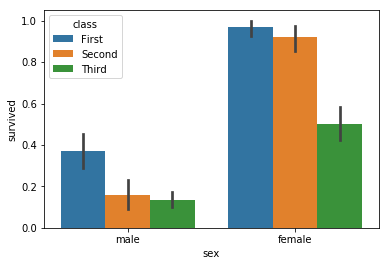

In [12]:
sns.barplot(x='sex', y='survived', hue="class", data=titDS)

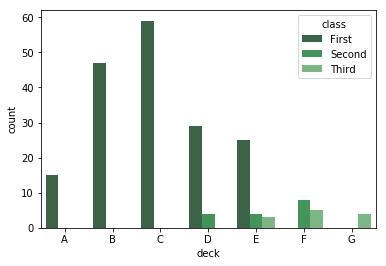

In [13]:
sns.countplot(x='deck', data=titDS, hue='class', palette='Greens_d')

Embark_town null values: True


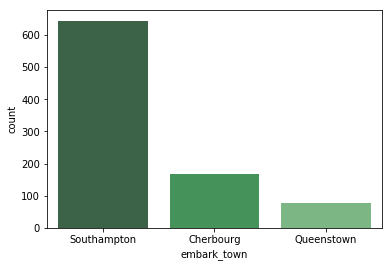

In [14]:
sns.countplot(x='embark_town', data=titDS, palette='Greens_d')
print("Embark_town null values: %s" % str(titDS['embark_town'].isnull().any()))

## Normalize the columns we want to use
First of all, we need to normalize the datas to make them fit for the classifier.

In [15]:
def norm_age(df):
    ageMed = df.age.median()
    df.age = df.age.fillna(ageMed)
    bins = (-1, 0, 5, 12, 18, 25, 35, 60, 120)
    group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
    categories = pd.cut(df.age, bins, labels=group_names)
    df.age = categories
    return df

def norm_deck(df):
    df.deck = df.deck.fillna('C')
    return df

def norm_embark_town(df):
    df.embark_town = df.embark_town.fillna('Southampton')
    return df

# Let's do opinable assumptions
titDS = norm_age(titDS)
titDS = norm_deck(titDS)
titDS = norm_embark_town(titDS)
titDS.head(6)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,Student,1,0,7.2500,S,Third,man,True,C,Southampton,no,False
1,1,1,female,Adult,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,Young Adult,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True
3,1,1,female,Young Adult,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,Young Adult,0,0,8.0500,S,Third,man,True,C,Southampton,no,True
5,0,3,male,Young Adult,0,0,8.4583,Q,Third,man,True,C,Queenstown,no,True


## Drop unnecessary columns and encode values in the remaining

In [16]:
titDS.drop(['pclass', 'who', 'adult_male', 'adult_male', 'alive', 'alone', 'embarked', 'parch', 'sibsp'],axis=1, inplace=True)
#
# we have to encode the data or the classifier will break 
#
features = ['sex', 'age', 'fare', 'class', 'deck', 'embark_town']
for feature in features:
    le = preprocessing.LabelEncoder()
    le = le.fit(titDS[feature])
    titDS[feature] = le.transform(titDS[feature])

titDS.head()    

,survived,sex,age,fare,class,deck,embark_town
0,0,1,4,18,2,2,2
1,1,0,0,207,0,2,0
2,1,0,6,41,2,2,2
3,1,0,6,189,0,2,2
4,0,1,6,43,2,2,2


## Subdivide data in train set and test set

In [17]:
X_all = titDS.drop('survived', axis=1)
y_all = titDS['survived']
num_test = 0.20
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=num_test, random_state=23)

## Now make prediction


In [18]:
#Chose the type of classifier
clf = RandomForestClassifier(n_estimators = 1000)

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)

clf.fit(X_train, y_train)

# ready to make predictions
predictions = clf.predict(X_test)

print(accuracy_score(y_test, predictions))

0.837988826816


## Are you able to improve the result?
Now is up to you...